# Appendix F. Deep Learning

To improve the prediction accuracy than that obtained with kNN machine learning model with only about 70% accuracy (see Appendix D), here I assess a neural network model.

***

<b>Table of contents</b>  
#### &nbsp;&nbsp; (I) Import and prepare dataset  
#### &nbsp;&nbsp; (II) Apply and optimize a neural network model
#### &nbsp;&nbsp; (III) Apply optimized model to actual datasets to validate 
#### &nbsp;&nbsp; (IV) Model deployment
#### &nbsp;&nbsp; (V) Conclusions and recommendations  

***

## (I) Import and prepare dataset

In [2]:
#import previously saved X_pca data
import pandas as pd

df_X_pca_y_label=pd.read_csv('data/df_X_pca_y_label.csv')
df_X_pca_y_label.head()

,0,1,2,3,4,5,6,7,8,9,...,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,Unnamed: 0
0,2.165246,-1.913285,0.559857,-1.000275,-0.731663,0.393345,0.461723,0.024931,0.128201,0.546596,...,0,1,1,0,0,0,0,0,0,1119-40-0
1,1.769939,-0.730425,-0.379644,-0.220102,0.313668,-0.270775,-0.548296,-0.232035,0.341710,-0.803873,...,0,1,1,0,0,0,0,0,0,120-33-2
2,1.768446,-0.160739,-0.859701,-0.297467,0.332351,0.022380,-0.898477,-0.673469,0.492942,-0.615592,...,0,1,1,0,0,0,0,0,0,120-51-4
3,-0.861896,-0.719336,-0.527922,-0.097590,-0.744385,-0.018977,0.132913,-0.230152,-0.071709,0.092117,...,0,1,1,0,0,0,0,0,0,120650-77-3
4,2.169022,-1.109823,0.040678,-0.249379,-0.100398,-0.215206,-0.301192,0.468600,0.519906,-0.574810,...,0,1,1,0,0,0,0,0,0,1335-40-6


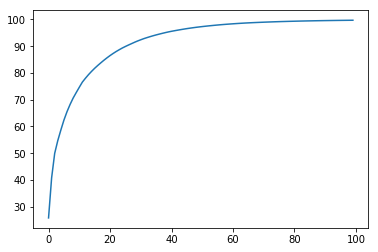

In [3]:
#check
import numpy as np
import matplotlib.pyplot as plt
no_components=100

#check saved, imported pca model
from pickle import load

filename='data/pca_model.sav'

#open pca model and test
loaded_pca_model=load(open(filename,'rb'))
loaded_pca_model.inverse_transform(df_X_pca_y_label.iloc[:,0:100])

#check model
#plot graph inline
%matplotlib inline

plt.plot(np.arange(no_components),100*loaded_pca_model.explained_variance_ratio_.cumsum())
plt.show()

- The pca model imports correctly. 

## (II) Apply and optimize a neural network model

(a) pre-process data

In [4]:
#split datasets into train/test datasets

from sklearn.model_selection import train_test_split

X=np.array(df_X_pca_y_label.iloc[:,0:100])
Y=np.array(df_X_pca_y_label.iloc[:,100:110])

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=13)

#Note: Since spectra have been previously normalized, there is no need to apply scaling (see Appendix D).

(b) Apply a baseline model

In [5]:
#neural network optimization approach is adapted from: "Deep learning With Python", Jason Brownlee, Machine Learning Mastery. 
#import classes
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

from keras.utils import to_categorical

#establish random number
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

from numpy import array
#define model

num_classes=10

def make_baseline_model(n_comp):
        
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=n_comp, kernel_initializer='normal', activation='relu'))

    #https://datascience.stackexchange.com/questions/16182/multiple-output-classes-in-keras/16204#16204
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid')) #Using softmax for multilabel binary output
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

Using TensorFlow backend.


In [6]:

#vary number of components to between 20 and 40
n_comps=[20,30,40]

baseline_error=[] #store results in this array

#vary number of components to between 20 and 40
for n_comp in n_comps:
    # split and truncate datasets according to the define number of components, n_comp
    X_trunc_train, X_trunc_test, y_trunc_train, y_trunc_test = train_test_split(X[:,0:n_comp],Y, test_size=0.2, random_state=13)
    
    # build the model
    model = make_baseline_model(n_comp)
    
    #fit model
    model.fit(X_trunc_train, y_trunc_train, epochs=100, batch_size=50, verbose=2)

    # Final evaluation of the model
    scores = model.evaluate(X_trunc_test, y_trunc_test, verbose=0)
    print('n_component:', n_comp)
    baseline_error.append(100-scores[1]*100)
    
    #print out a summary of results:
print('\n')
print("Summary")

for i in range(3):
    print('n_comp:',n_comps[i],', error: %.2f%%' %(baseline_error[i]))

print('The minimum error is obtained with:', n_comp, ' components with accuracy of: %.2f%%' %(100-baseline_error[i]))    

Epoch 1/100
 - 1s - loss: 0.6764 - acc: 0.7278
Epoch 2/100
 - 0s - loss: 0.6521 - acc: 0.8750
Epoch 3/100
 - 0s - loss: 0.6267 - acc: 0.8883
Epoch 4/100
 - 0s - loss: 0.5986 - acc: 0.8870
Epoch 5/100
 - 0s - loss: 0.5679 - acc: 0.8843
Epoch 6/100
 - 0s - loss: 0.5340 - acc: 0.8849
Epoch 7/100
 - 0s - loss: 0.4983 - acc: 0.8843
Epoch 8/100
 - 0s - loss: 0.4626 - acc: 0.8849
Epoch 9/100
 - 0s - loss: 0.4274 - acc: 0.8864
Epoch 10/100
 - 0s - loss: 0.3958 - acc: 0.8873
Epoch 11/100
 - 0s - loss: 0.3672 - acc: 0.8901
Epoch 12/100
 - 0s - loss: 0.3428 - acc: 0.8910
Epoch 13/100
 - 0s - loss: 0.3222 - acc: 0.8935
Epoch 14/100
 - 0s - loss: 0.3050 - acc: 0.8951
Epoch 15/100
 - 0s - loss: 0.2902 - acc: 0.8981
Epoch 16/100
 - 0s - loss: 0.2774 - acc: 0.9022
Epoch 17/100
 - 0s - loss: 0.2661 - acc: 0.9059
Epoch 18/100
 - 0s - loss: 0.2560 - acc: 0.9086
Epoch 19/100
 - 0s - loss: 0.2467 - acc: 0.9093
Epoch 20/100
 - 0s - loss: 0.2380 - acc: 0.9105
Epoch 21/100
 - 0s - loss: 0.2302 - acc: 0.9117
E

Epoch 72/100
 - 0s - loss: 0.0817 - acc: 0.9691
Epoch 73/100
 - 0s - loss: 0.0807 - acc: 0.9701
Epoch 74/100
 - 0s - loss: 0.0800 - acc: 0.9704
Epoch 75/100
 - 0s - loss: 0.0790 - acc: 0.9710
Epoch 76/100
 - 0s - loss: 0.0782 - acc: 0.9713
Epoch 77/100
 - 0s - loss: 0.0774 - acc: 0.9716
Epoch 78/100
 - 0s - loss: 0.0767 - acc: 0.9719
Epoch 79/100
 - 0s - loss: 0.0758 - acc: 0.9725
Epoch 80/100
 - 0s - loss: 0.0750 - acc: 0.9731
Epoch 81/100
 - 0s - loss: 0.0742 - acc: 0.9731
Epoch 82/100
 - 0s - loss: 0.0735 - acc: 0.9738
Epoch 83/100
 - 0s - loss: 0.0729 - acc: 0.9744
Epoch 84/100
 - 0s - loss: 0.0722 - acc: 0.9750
Epoch 85/100
 - 0s - loss: 0.0714 - acc: 0.9747
Epoch 86/100
 - 0s - loss: 0.0708 - acc: 0.9747
Epoch 87/100
 - 0s - loss: 0.0700 - acc: 0.9744
Epoch 88/100
 - 0s - loss: 0.0695 - acc: 0.9747
Epoch 89/100
 - 0s - loss: 0.0688 - acc: 0.9756
Epoch 90/100
 - 0s - loss: 0.0683 - acc: 0.9759
Epoch 91/100
 - 0s - loss: 0.0676 - acc: 0.9759
Epoch 92/100
 - 0s - loss: 0.0671 - acc:

- The best score is obtained with n_comp=40. 
- From here onwards, I am fixing the dataset to having n_comp=40.

In [7]:
#fixing n_comp=40
n_comp=40


X=X[:,:40]
Y=Y[:,:40]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=13)


(c) For comparison, let's also check what the score is like by counting the number of correctly predicted labels with respect to the total number of possible labels.

In [8]:
#manually compare predicted versus actual

predicted=np.round(model.predict(X_test)).astype(int)
actual=y_test

score=0

#get a score
for i in range(len(predicted)):  
    for j in range(10):
        if predicted[i][j]==actual[i][j]:
            score+=1 #if matching, add 1 to the score
score=100*score/(10*len(predicted))
print('Calculated score: %.2f%%' %(score))
print('Calculated error: %.2f%%' %(100-score))

Calculated score: 94.94%
Calculated error: 5.06%


- The calculated score is in agreement with that calculated above using keras.

(d) evaluate a deeper, wider model

In [8]:
def make_deeper_wider_model(neurons,no_hidden_layers):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=n_comp, kernel_initializer='uniform', activation='relu', kernel_constraint=maxnorm(4)))
    if no_hidden_layers==1:
        model.add(Dense(neurons, activation='relu'))
        
    elif no_hidden_layers==2:  
        model.add(Dense(neurons, activation='relu'))
        model.add(Dense(neurons, activation='relu'))
                
    elif no_hidden_layers==4:  
        model.add(Dense(neurons, activation='relu'))
        model.add(Dense(neurons, activation='relu'))
        model.add(Dense(neurons, activation='relu'))
        model.add(Dense(neurons, activation='relu'))
                
    model.add(Dense(10, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [9]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.constraints import maxnorm

deeper_wider_model = KerasClassifier(build_fn=make_deeper_wider_model, epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
neurons = [128,512,1028]
no_hidden_layers = [1,2,4]
param_grid = dict(neurons=neurons,no_hidden_layers=no_hidden_layers)
grid = GridSearchCV(estimator=deeper_wider_model, param_grid=param_grid, cv=5)
grid_result = grid.fit(X, Y)


In [10]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.862963 using {'neurons': 512, 'no_hidden_layers': 1}
0.860741 (0.048933) with: {'neurons': 128, 'no_hidden_layers': 1}
0.857778 (0.046453) with: {'neurons': 128, 'no_hidden_layers': 2}
0.853827 (0.048690) with: {'neurons': 128, 'no_hidden_layers': 4}
0.862963 (0.049339) with: {'neurons': 512, 'no_hidden_layers': 1}
0.859753 (0.052533) with: {'neurons': 512, 'no_hidden_layers': 2}
0.853333 (0.048908) with: {'neurons': 512, 'no_hidden_layers': 4}
0.856543 (0.047760) with: {'neurons': 1028, 'no_hidden_layers': 1}
0.853580 (0.044940) with: {'neurons': 1028, 'no_hidden_layers': 2}
0.841235 (0.039294) with: {'neurons': 1028, 'no_hidden_layers': 4}


- The best model contains 512 neurons and 1 hidden layer. 
- The next step is to apply checkpoint and retain the best model determined during the epoch runs.

(e) Apply model checkpoint to retain the best model during epoch runs

In [11]:
#save the best model to a file

#generate the best model using parameters found above (i.e., 512 neurons with 1 hidden layer)
from keras.callbacks import ModelCheckpoint

final_model = Sequential()
final_model.add(Dense(512, input_dim=40, kernel_initializer='uniform', activation='relu'))
final_model.add(Dense(512, kernel_initializer='uniform', activation='relu'))
final_model.add(Dense(10, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
final_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
filepath="data/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,mode='max')

callbacks_list = [checkpoint]

# Fit the model
final_model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=10, callbacks=callbacks_list,verbose=0)

Epoch 00001: val_acc improved from -inf to 0.82612, saving model to data/weights-improvement-01-0.83.hdf5
Epoch 00002: val_acc improved from 0.82612 to 0.85746, saving model to data/weights-improvement-02-0.86.hdf5
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
Epoch 00010: val_acc did not improve
Epoch 00011: val_acc did not improve
Epoch 00012: val_acc did not improve
Epoch 00013: val_acc did not improve
Epoch 00014: val_acc did not improve
Epoch 00015: val_acc did not improve
Epoch 00016: val_acc did not improve
Epoch 00017: val_acc did not improve
Epoch 00018: val_acc did not improve
Epoch 00019: val_acc did not improve
Epoch 00020: val_acc did not improve
Epoch 00021: val_acc did not improve
Epoch 00022: val_acc did not improve
Epoch 00023: val_acc did not improve
Epoch 00

## (III) Apply optimized model to actual datasets to validate

(a) load final model

In [9]:
#load saved model and check
from keras.models import load_model
loaded_nn_model = load_model('data/weights-improvement-02-0.86.hdf5')

print("Loaded model from disk")

# evaluate loaded model on test data
loaded_nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

score = loaded_nn_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_nn_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 90.02%


In [10]:
#compare predicted versus actual using the final model

predicted=np.round(loaded_nn_model.predict(X_test)).astype(int)
actual=y_test

score=0

#Manually calculate the score by counting the number of correct predictions
for i in range(len(predicted)):  
    for j in range(10):
        if predicted[i][j]==actual[i][j]:
            score+=1 #if matching, add 1 to the score
score=100*score/(10*len(predicted))
print('Calculate score: %.2f%%' %(score))

Calculate score: 90.74%


- The calculated accuracy of about 91% is in agreement with the accuracy calculated above using Keras.

(b) Validation data (10)  


#label guides
    The label names are as follows:  
     1. 'C-H'  
     2. 'C=C'
     3. 'C=O'
     4. 'C-O'
     5. 'O-H'
     6. 'C-N'
     7. 'N-H'
     8. 'C-X'
     9. 'Ar'
     10. 'C-H_ald' #C-H vibration of aldehyde

In [11]:
jdx_files=['141-43-5','108-95-2','106-97-8','71-23-8','79-20-9','112-62-9','75-44-5']
actual_labels=[[1,0,0,1,1,1,1,0,0,0],
               [1,0,0,1,1,0,0,0,0,0],
               [1,0,0,0,0,0,0,0,0,0],
               [1,0,0,1,1,0,0,0,0,0],
               [1,0,1,1,1,0,0,0,0,0],
               [1,1,1,1,0,0,0,0,0,0],
               [0,0,1,0,0,0,0,1,0,0]]  
              
#functional group labels for annotation
func_group_labels=['C-H','C=C','C=O','C-O','O-H','C-N','N-H','C-X','Ar','C-H_ald']

#!need to add a second C-H band.
#!need to correct the bands locations

def plot_labels():
    """
    plot bands that correspond to the ten functional groups
    """
    
    x_marker=[[2800,3000],[3000,3050],[1650,1750],[950,1050],[2800,3400],
         [2000,2400],[3200,3400],[600,800],[1200,1650],[2600,2800]]
    y_marker=[[0.5,0.5],[0.55,0.55],[0.6,0.6],[0.65,0.65],[0.7,0.7],
         [0.75,0.75],[0.8,0.8],[0.85,0.85],[0.9,0.9],[0.95,0.95]]

    for i in range(10):
        plt.plot(x_marker[i], y_marker[i],'r', [1300,1500],[0.5,0.5],'r')
        #add annotation for each element in the func_group_labels array
        plt.annotate('%s. %s' %(i+1,func_group_labels[i]), xy=(x_marker[i][0],y_marker[i][0]))
        #add annotation for the additional C-H bending band
        plt.annotate('1. C-H (bend)', xy=(1300,0.5))
        

In [12]:
def plot_labels():
    """
    plot IR bands that correspond to the ten functional groups
    """
    #http://www2.ups.edu/faculty/hanson/Spectroscopy/IR/IRfrequencies.html
    #updated
    x_marker=[[2850,3000],[3010,3100],[1670,1820],[1000,1300],[3200,3600],
         [1080,1360],[3250,3400],[500,1400],[1400,1600],[2720,2850]]
    y_marker=[[0.5,0.5],[0.55,0.55],[0.6,0.6],[0.65,0.65],[0.7,0.7],
         [0.75,0.75],[0.8,0.8],[0.85,0.85],[0.9,0.9],[0.95,0.95]]

    for i in range(10):
        plt.plot(x_marker[i], y_marker[i],'r', [1350,1480],[0.5,0.5],'r', [675,1000],[0.55,0.55],'r')
        #add annotation for each element in the func_group_labels array
        plt.annotate('%s. %s' %(i+1,func_group_labels[i]), xy=(x_marker[i][0],y_marker[i][0]))
        #add annotation for the additional C-H bending band
        plt.annotate('1. -C-H (bend)', xy=(1300,0.5))
        #add annotation for the additional C=H bending band
        plt.annotate('2. =C-H (bend)', xy=(675,0.55))

def functional_group_predictor(jdx_file,label,print_accuracy='True'):
    """
    Apply unit conversion, baseline subtraction, and normalization to a raw jdx spectrum and then apply the final neural network model
    
    inputs: 
        jdx_file=IR spectrum in jcamp format
        label=a multible binary label
        
    The label names are as follows:  
     1. 'C-H'  
     2. 'C=C'
     3. 'C=O'
     4. 'C-O'
     5. 'O-H'
     6. 'C-N'
     7. 'N-H'
     8. 'C-X'
     9. 'Ar'
     10. 'C-H_ald' #C-H vibration of aldehyde
    
    outputs:
        - a plot of the spectrum that has been converted into the appropriate units, baselined, and normalized.
        - predicted label
        - accuracy score
    """

    import my_jcamp
    import common
    
    compound1=my_jcamp.JCAMP_reader(jdx_file)

    compound1=common.standardize_units(compound1)
    compound1=common.interpolate_spectrum(compound1,600,3500,4)
    
    plt.plot(compound1['x'],compound1['y'], 'b') #check treated spectrum
    
    #plot horizontal lines to mark the predicted functional groups
    plot_labels()
    
    #reshape y values and convert into np.array
    compound1_X=np.array(compound1['y']).reshape(1,725)
    
    #apply pca
    #truncate the number of components, n_comp, to 20. This number is determined in section IIb above.
    compound1_pca=loaded_pca_model.transform(compound1_X)  
    
    #feed into model to predict functional groups
    predicted_label=np.round(loaded_nn_model.predict(compound1_pca[:,:n_comp]))
    print('predicted label:', predicted_label)
    
    
    if print_accuracy=='True': #print accuracy score only if it is set to true
        print("%s: %.2f%%" % (loaded_nn_model.metrics_names[1],
                          loaded_nn_model.evaluate(compound1_pca[:,:n_comp], np.array(label).reshape(1,10))[1]*100))
    
    plt.xlabel('Wavenumber, cm-1')
    plt.ylabel('Absorbance')
    plt.title('%s, predicted label: %s' %(compound1['title'],predicted_label))
    plt.show()

actual label: [1, 0, 0, 1, 1, 1, 1, 0, 0, 0]
predicted label: [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
1/1 [==============================] - 0s 107ms/step
acc: 60.00%


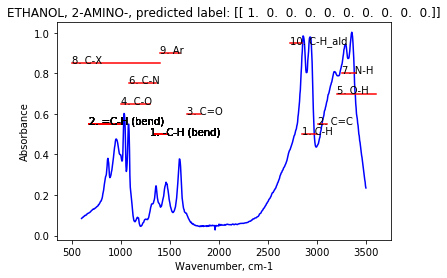

actual label: [1, 0, 0, 1, 1, 0, 0, 0, 0, 0]
predicted label: [[ 1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]
1/1 [==============================] - 0s 1ms/step
acc: 70.00%


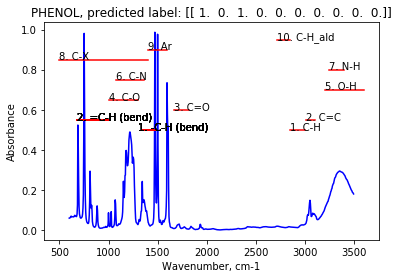

actual label: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
predicted label: [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
1/1 [==============================] - 0s 1ms/step
acc: 100.00%


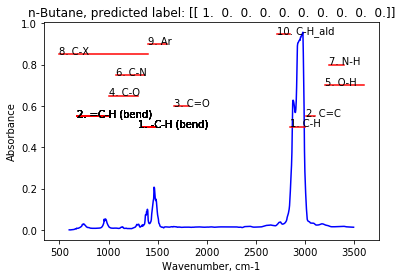

actual label: [1, 0, 0, 1, 1, 0, 0, 0, 0, 0]
predicted label: [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
1/1 [==============================] - 0s 1ms/step
acc: 80.00%


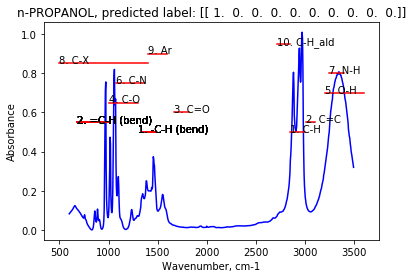

actual label: [1, 0, 1, 1, 1, 0, 0, 0, 0, 0]
predicted label: [[ 1.  0.  1.  1.  0.  0.  0.  0.  0.  0.]]
1/1 [==============================] - 0s 1ms/step
acc: 90.00%


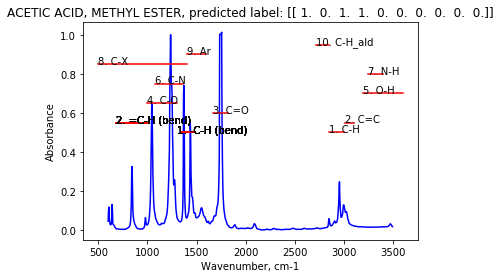

actual label: [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
predicted label: [[ 1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]
1/1 [==============================] - 0s 1ms/step
acc: 80.00%


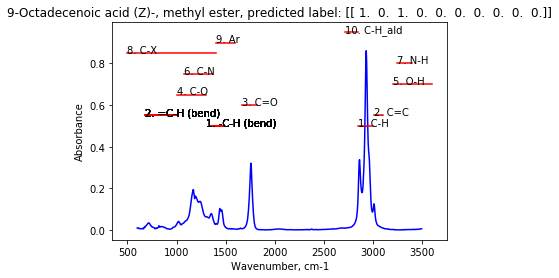

actual label: [0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
predicted label: [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
1/1 [==============================] - 0s 2ms/step
acc: 70.00%


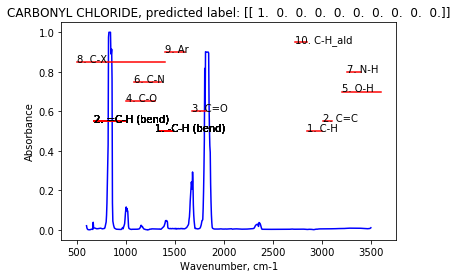

In [13]:
#test model with validation dataset.
#these datasets are not part of training/test dataset
#these datasets contain more than one fragment.
  
%matplotlib inline

for each in range(len(jdx_files)):
    
    print('actual label:', actual_labels[each])
    functional_group_predictor('validation/%s.jdx' %(jdx_files[each]),actual_labels[each],'True')
    

In [14]:
#check to verify that the validation datasets are not part of train/test dataset

#for i in jdx_files

df_train_test=pd.read_csv('data/df_X_PCA_y_label.csv')
#df_train_test.head() #check
#df_train_test.columns

for each in df_train_test['Unnamed: 0']:
    if each in jdx_files:
        print('True', each)
             

True 108-95-2
True 106-97-8


- The model does not identify the N-H and O-H fragments accurately. More precise training data are required to improve the model.

## (IV) Model deployment

In the intended application, the user will interact with the program using a graphical user interface (GUI). Below demonstrates a simple design for a proof-of-concept. The description og the GUI is as follows:

1. The GUI allows user to locate and open a .jdx file by going to file > open.
2. The graph of the raw data is displyed. 
3. Upon clicking on Tools > analyze, the spectrum will be analyzed for the presence/absence of the ten functional groups.

C:/Work/Professional development 2016-/5. Springboard Data Science Oct 2017/2. Springboard Materials 091117 (PC)/5. Springboard assignments/Capstone1/FINAL REPORT v2/032318 (latest)/validation/112-62-9.jdx
predicted label: [[ 1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]


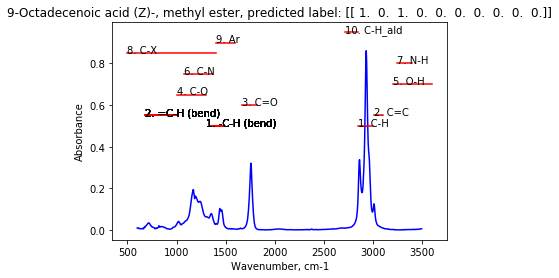

In [16]:

import my_jcamp
import glob
import common 
import pandas as pd
import matplotlib.pyplot as plt


"""
Generate a GUI interface
"""

import tkinter as tk
from tkinter import filedialog

def quit():
    #global root
    root.destroy()

def dialogbox():
    root.filename =  tk.filedialog.askopenfilename(initialdir = "/",title = "Select file",filetypes = (("all files","*.*"),("jcamp files","*.jdx")))
    print (root.filename)
    
    #https://stackoverflow.com/questions/40089212/anaconda-python-3-5-install-pyqt4
    #to activate, type in anaconda prompt: conda activate py35_qt4. to deactivate, type: conda deactivate.
    #%matplotlib inline 
    %matplotlib inline
    
    #apply func group predictor function
    
    functional_group_predictor(root.filename,[0,0,0,0,0,0,0,0,0,0],'False')
    
    ##spectrum=my_jcamp.JCAMP_reader(root.filename)
    ##plt.plot(spectrum['x'],spectrum['y'])
    ##plt.show()

root = tk.Tk()
root.geometry("200x50")

frame = tk.Frame(root, takefocus=True) #place window on top

#create buttons
frame.pack()
button = tk.Button(frame, 
                   text="Open and predict a spectrum", 
                   fg="Blue",
                   command=dialogbox)

button.pack(side=tk.LEFT)

#slogan = tk.Button(frame,
#                   text="Pick peaks")
                   #command=pick_peaks)

#slogan.pack(side=tk.LEFT)

"""
7b. Generate a menu
"""
# creating a menu instance
menubar = tk.Menu(root)

# create a pulldown menu, and add it to the menu bar
filemenu = tk.Menu(menubar, tearoff=0)
#filemenu.add_command(label="Open and predict", command=dialogbox)
#filemenu.add_command(label="Save")
#filemenu.add_separator()
filemenu.add_command(label="Exit", command=quit)
menubar.add_cascade(label="File", menu=filemenu)

# display the menu
root.config(menu=menubar)


root.mainloop()

## (V) Conclusions

#### Conclusions:
- By utilizing a neural network model, the accuracy is improved from about 60% to about 90%.
- The final model consists of one hidden layer and 512 neurons.
- A validation dataset is applied to the final model. An accuracy score between 60 and 100% is obtained. While the model is trained using compounds that belong to a single functional group, the validation dataset contains compounds that consist of multiple fragments. 
- The model seems to perform badly in identifying N-H and O-H fragments. 
- A larger number and a more precise training data are required to improve the model. 
